## <span style='color:lightblue;'>What is a image histogram?</span>  
A histogram in image processing is a graphical representation of the distribution of pixel intensities in a digital image. It quantifies the number of pixels for each intensity value considered. 

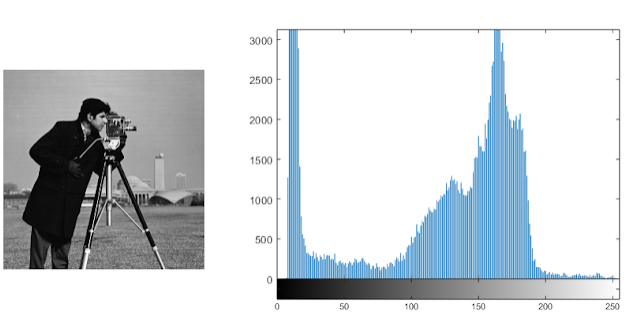


Here's a more detailed explanation:

 **<span style='color:lightblue;'>องค์ประกอบของฮิสโตแกรมของภาพ</span>**

1. **<span style='color:lightgreen;'>แกน :</span>**
    - แกน X แสดงค่าความเข้ม (โดยปกติอยู่ในช่วง 0 ถึง 255 ในภาพ 8 บิต)
    - แกน Y แสดงจำนวนพิกเซลในภาพที่มีค่าความเข้มแต่ละค่า

2. **<span style='color:lightgreen;'>ความเข้ม :</span>**
    - ในภาพโทนสีเทา ค่าความเข้มอยู่ในช่วง 0 (สีดำ) ถึง 255 (สีขาว)
    - ในภาพสี สามารถสร้างฮิสโตแกรมสำหรับแต่ละช่องสี (แดง, เขียว, น้ำเงิน)

3. **<span style='color:lightgreen;'>Bin :</span>**
    - แต่ละคอลัมน์ในฮิสโตแกรมแสดง 'bin' ที่นับจำนวนพิกเซลในภาพที่มีค่าความเข้มเฉพาะ

**<span style='color:Tomato;'>การใช้งานฮิสโตแกรมในการประมวลผลภาพ (ในบทนี้)</span>**

1. **<span style='color:orange;'>การปรับปรุงภาพ :</span>**
    - ฮิสโตแกรมใช้ในเทคนิคต่างๆ เช่น การปรับสมดุลฮิสโตแกรม ซึ่งปรับปรุงความคมชัดในภาพ

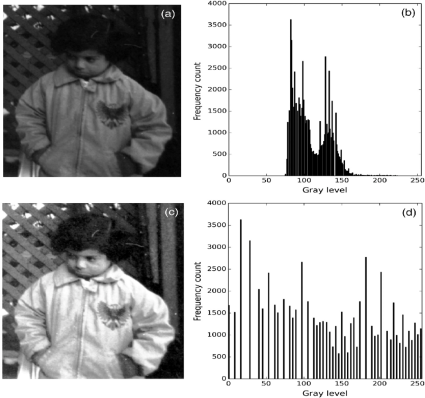

2. **<span style='color:orange;'>การกำหนดเกณฑ์ (การแยกพื้นหลังและพื้นหน้า) :</span>**
    - ฮิสโตแกรมสามารถช่วยในการกำหนดค่าเกณฑ์ที่ดีเพื่อแยกวัตถุในภาพ
    - ช่วยในการแยกแยะระหว่างส่วนประกอบต่างๆ ของภาพโดยอ้างอิงจากความเข้มของพิกเซล

    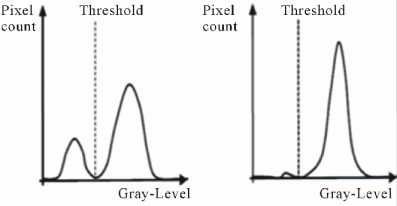   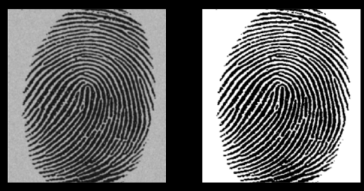

#### <span style='color:lightblue;'>การประมวลผลฮิสโตแกรมใน Python</span>  
1. **<span style='color:lightgreen;'>นำเข้าไลบรารี</span>**
    - นำเข้าไลบรารีที่จำเป็น

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

2. **<span style='color:lightgreen;'>อ่านภาพ</span>**
    - โหลดภาพโดยใช้ OpenCV

In [2]:
img = cv2.imread('./images/bank3.jpg', 0)

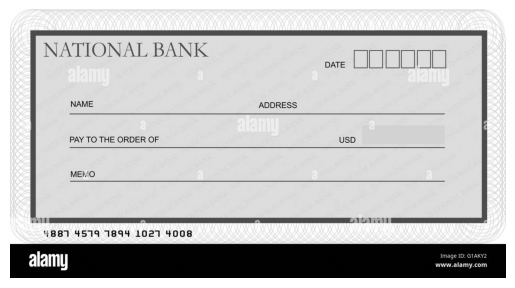

In [3]:
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

3. **<span style='color:lightgreen;'>คำนวณฮิสโตแกรมโดยใช้ไลบรารี cv2</span>**
    - คำนวณฮิสโตแกรมของภาพ

In [ ]:
# cv2.calcHist(images, channels, mask, histSize, ranges)
hist_0 = cv2.calcHist([img], [0], None, [256], [0, 256]) # คำนวณ histogram ของภาพดั้งเดิม

พารามิเตอร์:
1. images - รายการของภาพต้นทาง [img]
    - ต้องให้เป็น list แม้จะเป็นภาพเดียว
2. channels - ช่องสี [0]
    - [0] = Gray/Blue channel
    - [1] = Green channel
    - [2] = Red channel
    - [0, 1, 2] = ทั้ง 3 ช่อง (สำหรับ 3D histogram)
3. mask - หน้ากากสำหรับการคำนวณบางพื้นที่ None
    - None = นับทั้งภาพ
    - หากส่งภาพ mask จะนับเฉพาะพื้นที่ที่ mask เป็น 255
4. histSize - จำนวน bin [256]
    - [256] = 256 bin (0-255)
    - [16] = 16 bin (ฮิสโตแกรมแบบหยาบ)
5. ranges - ช่วงค่า [0, 256]
    - [0, 256] = ช่วง 0-255
    - [0, 128] = นับเฉพาะครึ่งล่างของค่าความเข้ม

4. **<span style='color:lightgreen;'>พล็อตฮิสโตแกรม</span>**
    - ใช้ Matplotlib เพื่อแสดงผลฮิสโตแกรม

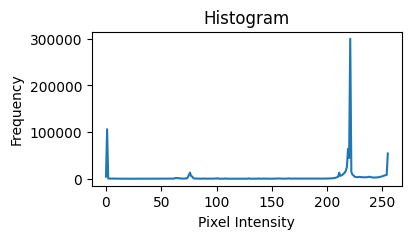

In [5]:
plt.figure(figsize=(4,2))
plt.plot(hist_0)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('histogram.png')

5. **<span style='color:lightgreen;'>คำนวณฮิสโตแกรมโดยไม่ใช้ไลบรารี cv2</span>**
    - นี่คือตัวอย่างสคริปต์ Python เพื่อสร้างฮิสโตแกรมของภาพโดยไม่ใช้ไลบรารีเฉพาะสำหรับฮิสโตแกรม:

In [6]:
hist_1 = np.zeros(256)
row, col = img.shape
for i in range(row):
    for j in range(col):
        intens = img[i, j]
        hist_1[intens] += 1

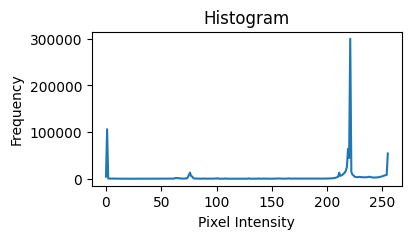

In [7]:
plt.figure(figsize=(4,2))
plt.plot(hist_1)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

5.1 **<span style='color:lightgreen;'>ตัวอย่างโค้ดเพิ่มเติมจาก test.ipynb</span>**  
- อ่านภาพ `cameraman` และนับฮิสโตแกรมด้วยการวนลูปเก็บลงอาร์เรย์
- โค้ดนี้ใช้ตัวแปรชุดใหม่ (`img`, `inten`) เพื่อไม่กระทบกับตัวอย่างก่อนหน้า

In [9]:
img = cv2.imread('./images/cameraman.png', cv2.IMREAD_GRAYSCALE)
print(type(img))

<class 'numpy.ndarray'>


In [10]:
inten = [0] *256 # สร้าง list เก็บค่าความถี่ของ intensity ที่มีค่าเริ่มต้นเป็น 0
inten = np.array(inten,dtype='int')

m,n = img.shape
for i in range(m):
    for j in range(n):
        inx = img[i][j]
        inten[inx] = inten[inx] + 1

print(m * n, inten.sum())
print(inten) # histrogram ค่าที่แสดงคือจำนวน pixel ที่มีค่า intensity แต่ละค่า

262144 262144
[ 102   76   89  114  159  209  335 1173 3523 5129 4490 4980 5762 6212
 6067 4480 2805 1375  860  625  498  503  426  430  379  398  418  402
  358  362  354  349  355  381  371  379  348  375  390  398  394  349
  327  345  311  263  256  279  274  258  258  245  242  261  265  268
  285  276  334  308  337  309  313  370  276  301  245  230  244  242
  222  217  230  238  235  224  205  220  213  208  164  203  222  216
  230  243  251  281  315  328  334  327  333  381  417  420  473  525
  573  620  650  687  727  760  803  816  924  986  981 1002 1085 1070
 1174 1202 1219 1190 1314 1321 1432 1399 1453 1539 1477 1509 1598 1592
 1691 1659 1745 1705 1734 1702 1663 1598 1655 1673 1626 1556 1435 1435
 1398 1449 1391 1514 1590 1800 1964 2096 2176 2147 2225 2163 2185 2117
 2258 2494 2524 2885 3045 3134 3767 4147 4596 4906 4790 4497 4195 3993
 3737 3415 2906 2785 2746 2615 2635 2596 2555 2702 2737 2662 2686 2778
 2646 2392 2236 1961 1595 1162  776  565  381  275  235  209  2

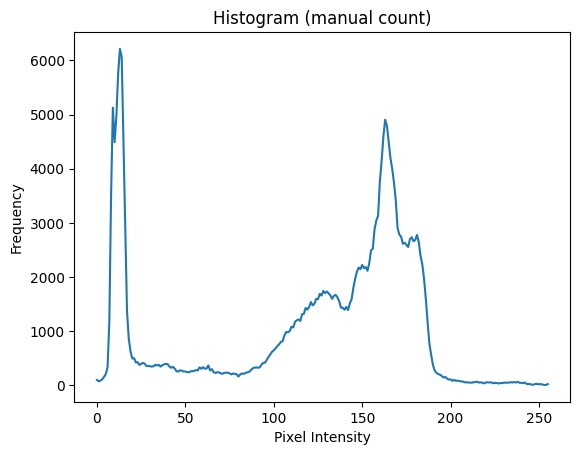

In [11]:
plt.plot(inten)
plt.title('Histogram (manual count)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()